# Topic Modeling: BERTopic

[BERTopic](https://maartengr.github.io/BERTopic/algorithm/algorithm.html) is a language model developed by the Hugging Face team. It is a variant of the BERT (Bidirectional Encoder Representations from Transformers) model, which is a transformer-based architecture for natural language processing tasks such as language understanding and language generation. BERT has been widely successful in a number of NLP tasks, and BERTopic is a variant that has been specifically designed to perform well on topic classification and other tasks related to identifying the main topic or theme of a piece of text.

Like other transformer models, BERTopic is trained using large amounts of data and is able to process input text in a way that takes into account the context and relationships between words in the text. This allows it to understand the meaning of words and phrases and make predictions about the topic or themes that are present in the text. BERTopic has been shown to be effective in a number of topic classification tasks and has been used in applications such as text summarization and content recommendation.

In [1]:
# Load necessary packages
import pandas as pd
from bertopic import BERTopic

import plotly.express as px
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
# svg_renderer.width = 900
# svg_renderer.height = 700
pio.renderers.default = "svg"

In [2]:
# Load the data
df = pd.read_hdf('./../../code/data/starbucks/data.h5', key='preprocessed_starbucks')

In [3]:
# Store only the required tweets
docs = df['preprocessed_tweet'].values.tolist()

BERTopic and other transformer-based models like it are designed to be able to process raw text input directly, without the need for extensive preprocessing. This is because they are able to automatically learn the relevant features from the input data during training, and do not require explicit feature engineering or representation like many other machine learning models.

One of the key features of transformer models is their ability to process input text using self-attention mechanisms, which allow them to take into account the relationships between words in the text and how they are related to one another. This enables them to understand the meaning of words and phrases and make predictions about their roles and relationships within the text, without the need for explicit preprocessing or feature engineering.

In addition, transformer models like BERTopic are trained on large amounts of data, which helps them learn the underlying patterns and structure of the language and allows them to generalize well to new, unseen text. This means that they are able to perform well on a wide range of natural language processing tasks, including topic classification, without the need for extensive preprocessing of the input data.

Since BERtopic is capable of utilizing deep learning based custom embeddings, the embeddings that will be used in the project is "all-MiniLM-L6-v2". It is an all-round model tuned for many use-cases which are trained on a large and diverse dataset of over 1 billion training pairs.

In [4]:
# Fit the model and apply the transformation
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", verbose=True)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/87 [00:00<?, ?it/s]

2022-12-16 23:18:23,555 - BERTopic - Transformed documents to Embeddings
2022-12-16 23:18:39,766 - BERTopic - Reduced dimensionality
2022-12-16 23:18:39,893 - BERTopic - Clustered reduced embeddings


In [5]:
print(f"Total number of topics idetermined by the algorithm in the document: {topic_model.get_topic_freq().shape[0]}")

Total number of topics idetermined by the algorithm in the document: 61


To get the topics that were determined by the algorithms for the dataset:

In [6]:
# Get the topic distribution
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1198,-1_like_drink_work_time
1,0,73,0_hng_fucking_haha_ew
2,1,67,1_drink_fall_menu_order
3,2,67,2_pumpkin_spice_cold_cream
4,3,60,3_barista_baristas_order_basis
...,...,...,...
56,55,11,55_seattle_nestle_brand_sb
57,56,11,56_chicfila_dre_drizzel_brussels
58,57,10,57_50_marketing_product_brand
59,58,10,58_mom_beg_bring_somepony


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


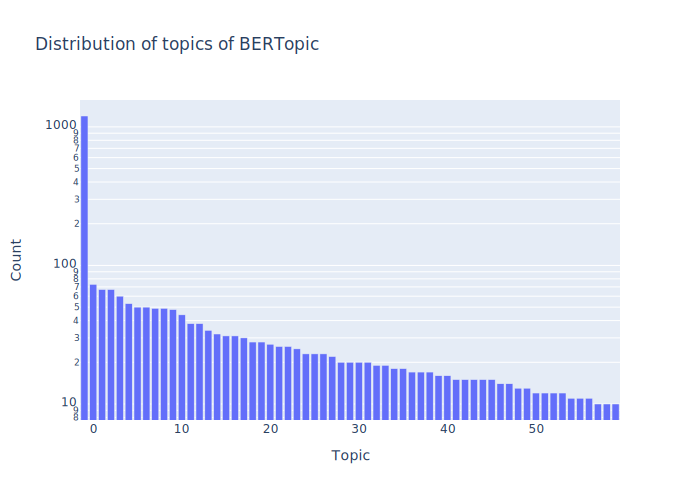

In [7]:
# Plot the topic distribution
fig = px.bar(topic_model.get_topic_info(), x='Topic', y='Count', log_y=True, title="Distribution of topics of BERTopic")
fig.show()

The topic "-1" represents outliers. There is several outliers that are reported by the algorithm. These documents or tweets do not belong to any topic that are found in the data set.

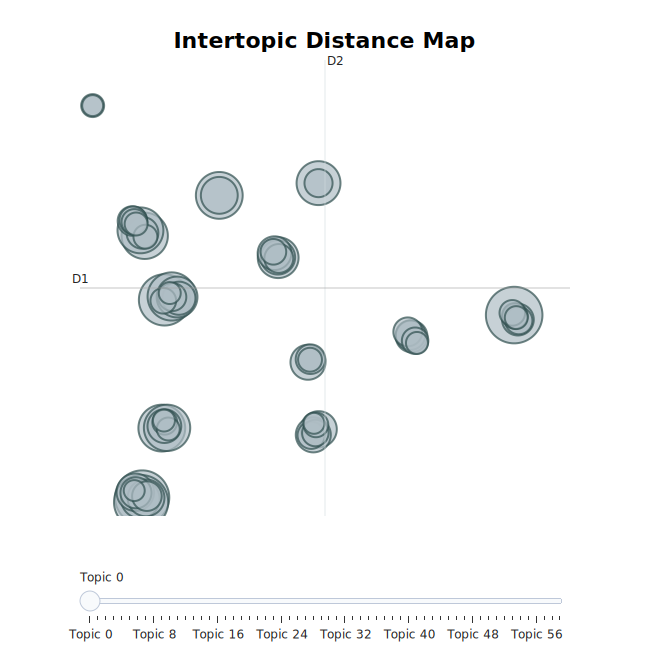

In [8]:
# Visualize the topic
topic_model.visualize_topics()

The above graph tells us that, there are certain major topics and certain minor topics. Most of the topics are subset of other topics. Hence it is prudent to reduce the number of topics.

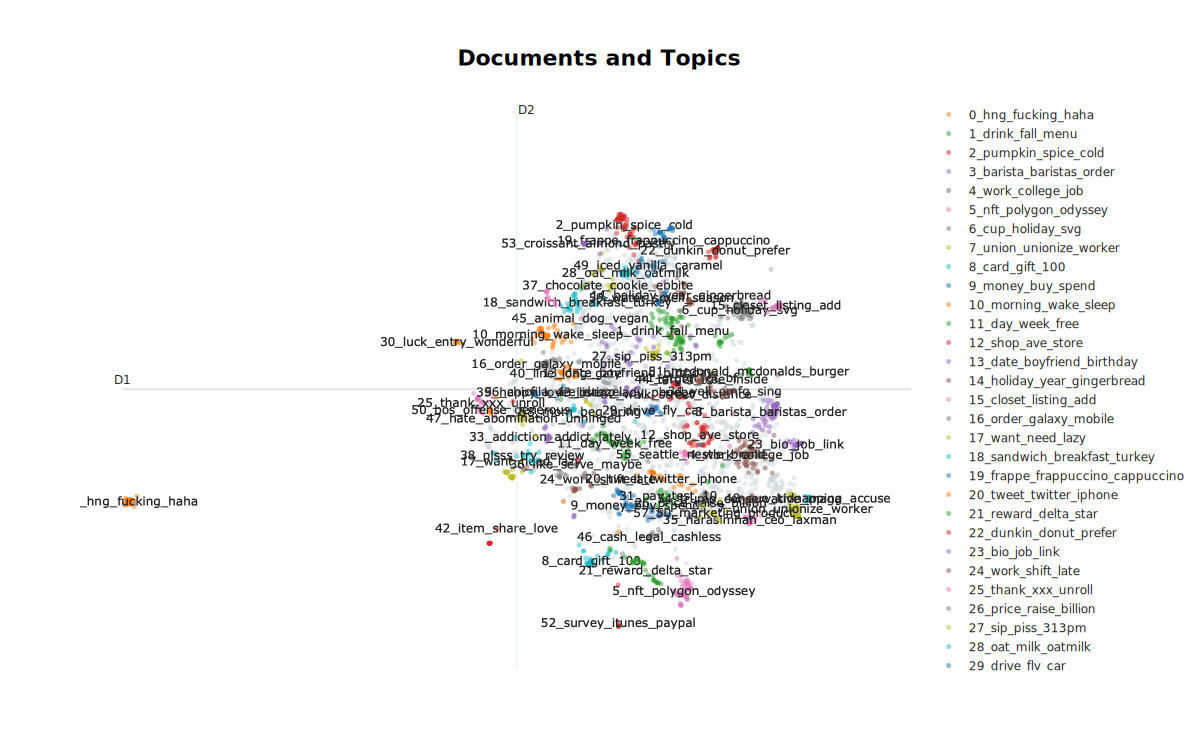

In [9]:
topic_model.visualize_documents(docs)

From the above graph it can be observed that the topics are not perfectly separable.

For reducing the number of topics:

In [10]:
# Reduce the number of topics
topic_model.reduce_topics(docs, nr_topics='auto')

2022-12-16 23:20:47,293 - BERTopic - Reduced number of topics from 61 to 32


In [11]:
# Get the updated topic distribution
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1198,-1_like_drink_work_time
1,0,632,0_card_gift_work_good
2,1,155,1_pumpkin_spice_iced_oat
3,2,73,2_fucking_hng_haha_ew
4,3,67,3_drink_fall_order_menu
5,4,60,4_barista_order_baristas_know
6,5,50,5_cup_holiday_new_svg
7,6,49,6_union_unionize_worker_labor
8,7,44,7_morning_wake_sleep_good
9,8,32,8_holiday_year_gingerbread_candle


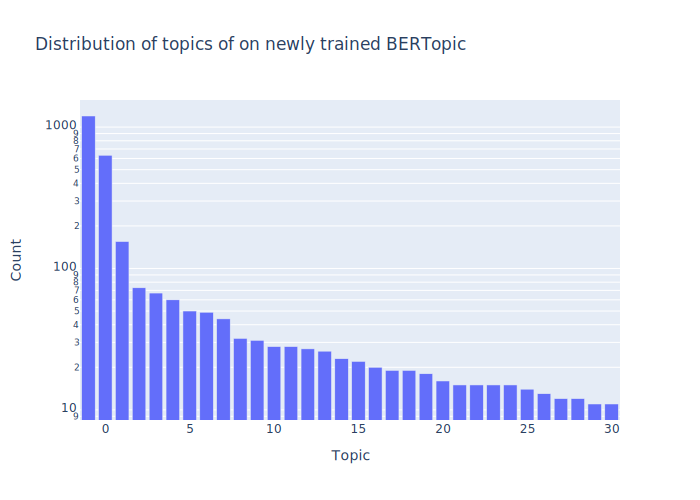

In [12]:
# Plot the topic distribution
fig = px.bar(topic_model.get_topic_info(), x='Topic', y='Count', log_y=True, title="Distribution of topics of on newly trained BERTopic")
fig.show()

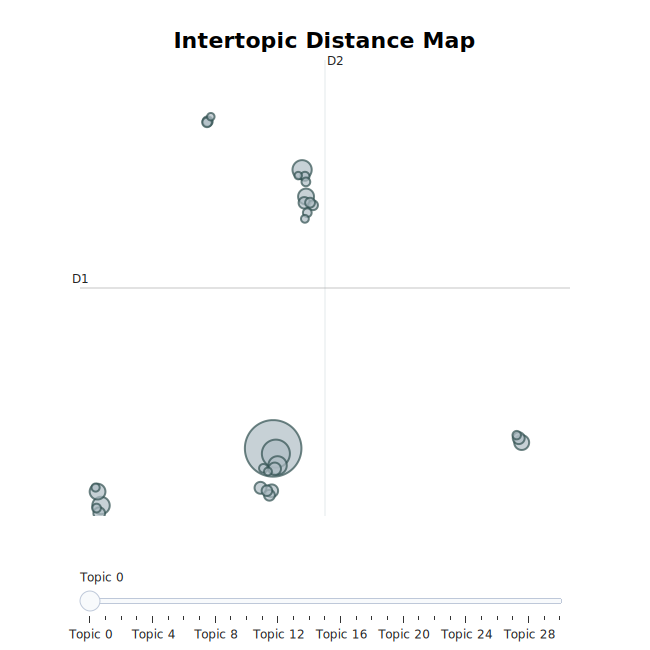

In [13]:
# Visualize the topic
topic_model.visualize_topics()

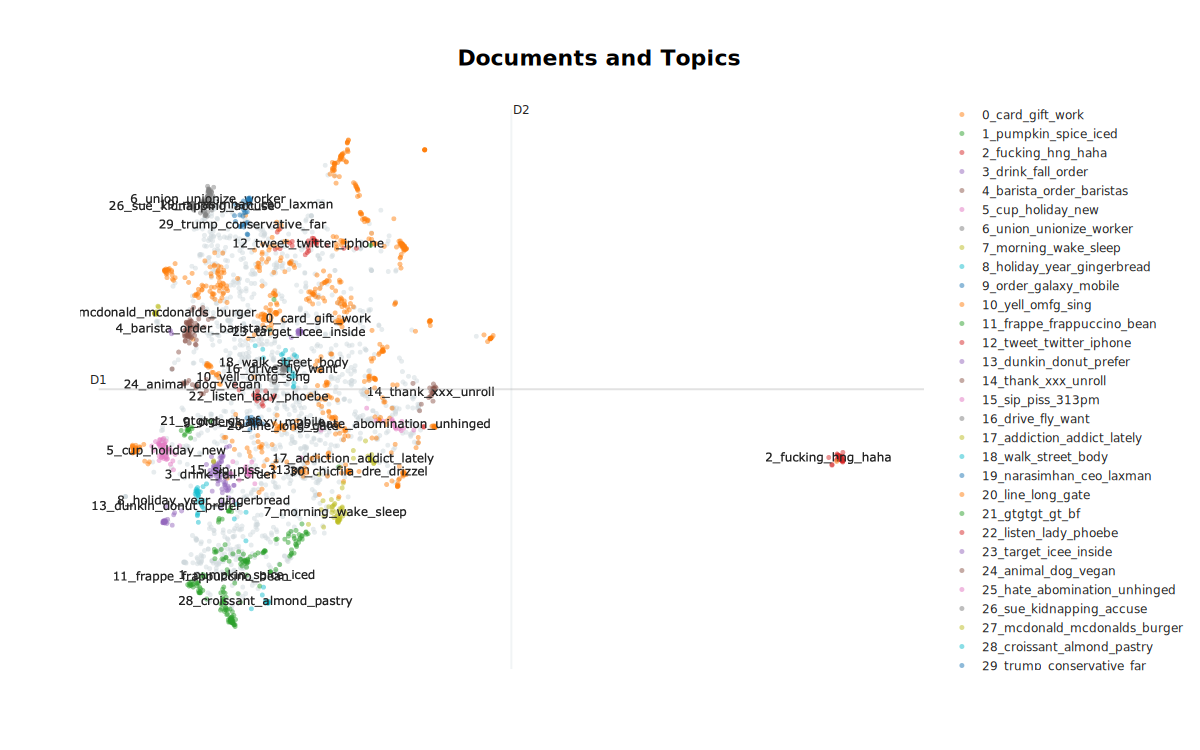

In [14]:
topic_model.visualize_documents(docs)

The topics now seems to be fairly separable and hence this can be considered as a better model than the initial model.